In [1]:
from datascience import*
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Education and Income of Californians Adults

In [2]:
full_table = Table.read_table('db/educ_inc.csv')
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17')).drop(0).sort('Population Count')
ca_2014

Age,Gender,Educational Attainment,Personal Income,Population Count
18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [3]:
no_ages = ca_2014.drop(0)
no_ages

Gender,Educational Attainment,Personal Income,Population Count
Female,No high school diploma,"H: 75,000 and over",2058
Male,No high school diploma,"H: 75,000 and over",2153
Female,No high school diploma,"G: 50,000 to 74,999",4666
Female,High school or equivalent,"H: 75,000 and over",7122
Female,No high school diploma,"F: 35,000 to 49,999",7261
Male,No high school diploma,"G: 50,000 to 74,999",8569
Female,No high school diploma,"G: 50,000 to 74,999",14635
Male,No high school diploma,"F: 35,000 to 49,999",15212
Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [4]:
no_ages.group([0, 1, 2], sum)

Gender,Educational Attainment,Personal Income,Population Count sum
Female,Bachelor's degree or higher,"A: 0 to 4,999",374723
Female,Bachelor's degree or higher,"B: 5,000 to 9,999",211446
Female,Bachelor's degree or higher,"C: 10,000 to 14,999",311524
Female,Bachelor's degree or higher,"D: 15,000 to 24,999",435732
Female,Bachelor's degree or higher,"E: 25,000 to 34,999",400218
Female,Bachelor's degree or higher,"F: 35,000 to 49,999",644603
Female,Bachelor's degree or higher,"G: 50,000 to 74,999",757705
Female,Bachelor's degree or higher,"H: 75,000 and over",1063291
Female,"College, less than 4-yr degree","A: 0 to 4,999",614511
Female,"College, less than 4-yr degree","B: 5,000 to 9,999",540089


In [5]:
education = ca_2014.select('Educational Attainment', 'Personal Income', 'Population Count')
educ = education.select('Educational Attainment', 'Population Count')
educ_totals = educ.group('Educational Attainment', sum)
educ_totals

Educational Attainment,Population Count sum
Bachelor's degree or higher,8525698
"College, less than 4-yr degree",7775497
High school or equivalent,6294141
No high school diploma,4258277


In [6]:
def percents(array_x):
    return np.round(array_x/sum(array_x) * 100, 2)

In [7]:
educ_distribution = educ_totals.with_column(
    'Population percent', percents(educ_totals.column(1))
)
educ_distribution

Educational Attainment,Population Count sum,Population percent
Bachelor's degree or higher,8525698,31.75
"College, less than 4-yr degree",7775497,28.96
High school or equivalent,6294141,23.44
No high school diploma,4258277,15.86


In [8]:
totals_sum = education.pivot('Educational Attainment', 'Personal Income', values='Population Count', collect=sum)
totals_sum

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [9]:
distributions = totals_sum.select(0).with_columns(
    "Bachelor's degree or higher", percents(totals_sum.column(1)),
    'College, less than 4-yr degree', percents(totals_sum.column(2)),
    'High school or equivalent', percents(totals_sum.column(3)),
    'No high school diploma', percents(totals_sum.column(4))
)
distributions

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11,15.61
"D: 15,000 to 24,999",9.07,17.3,19.9,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.7,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


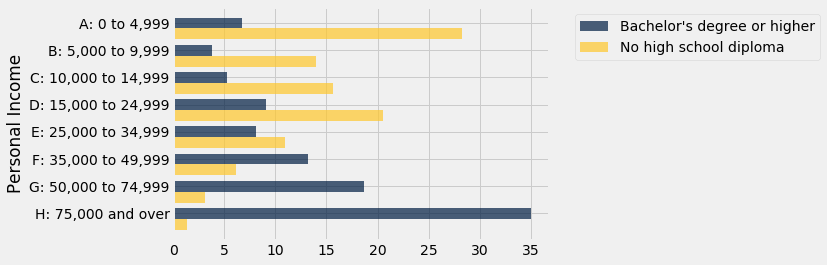

In [10]:
distributions.select(0, 1, 4).barh(0)

In [11]:
## Comparing Distributions

In [12]:
ca_2014

Age,Gender,Educational Attainment,Personal Income,Population Count
18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [13]:
educ_income = ca_2014.pivot(2, 3, 4, sum)
educ_income

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [14]:
def percent(x):
    """Convert an array of counts into percents"""
    return np.round((x/sum(x)) * 100, 2)

In [15]:
distributions = educ_income.select(0).with_columns(
    'Bachelors or Higher', percent(educ_income.column(1)),
    'High School', percent(educ_income.column(2))
)
distributions

Personal Income,Bachelors or Higher,High School
"A: 0 to 4,999",6.75,12.67
"B: 5,000 to 9,999",3.82,10.43
"C: 10,000 to 14,999",5.31,10.27
"D: 15,000 to 24,999",9.07,17.3
"E: 25,000 to 34,999",8.14,14.04
"F: 35,000 to 49,999",13.17,14.31
"G: 50,000 to 74,999",18.7,11.37
"H: 75,000 and over",35.03,9.62


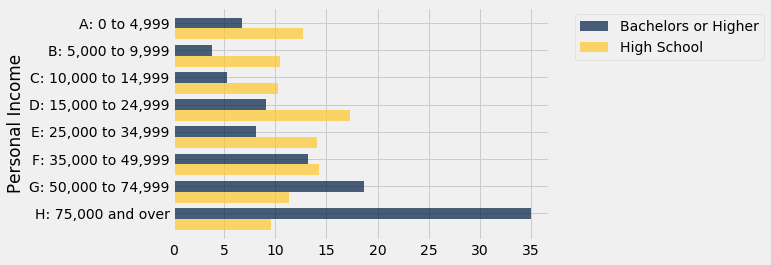

In [16]:
distributions.barh(0)